In [1]:
import numpy as np
import numpy.linalg as la
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import random as rd

# Wigner Matrix

In [2]:
def Wigner_Real(N, t=1):
    a = np.triu(np.random.normal(scale=1, size=(N,N)))
    s = (a + a.T)
    s[range(N), range(N)] /= 2
    return s

In [5]:
def plot_matrix(X, d, title, ax, color='Greens'):
    T = np.linspace(-2,2,d)
    ax.hist(X, bins=50, alpha=0.4, density=1)
    ax.plot(T, np.sqrt(4-T**2)/(2*np.pi), '--', color="Red", alpha=1)
    ax.set_title(title, fontsize=15)
    ax.set_xlabel('Eigenvalue', fontsize=10)
    ax.set_ylabel('Frequencey', fontsize=10)
    return ax

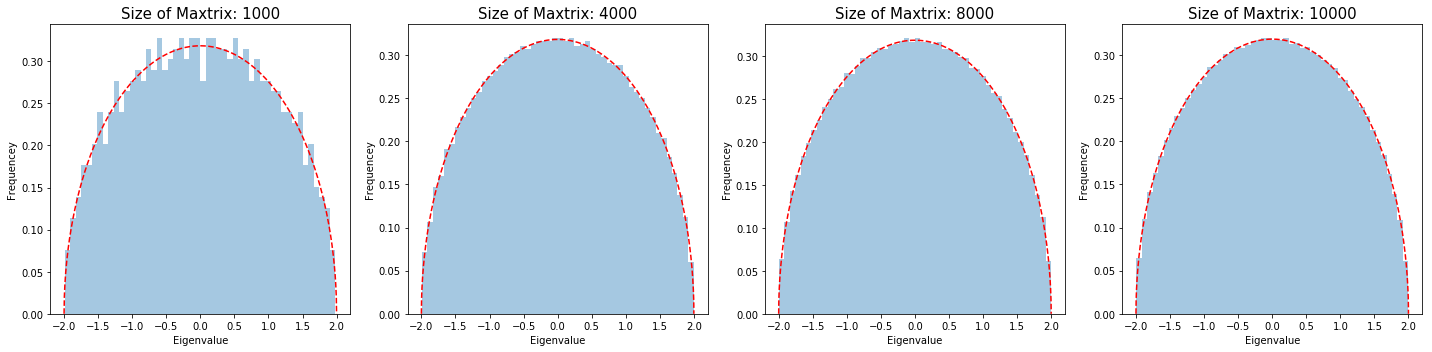

In [6]:
N = [1000, 4000, 8000, 10000]
eigs_norm = []
fig, ax = plt.subplots(1, len(N), figsize=(20,5))
ind = 0
for i in N:
    A = Wigner_Real(i)
    eigs = la.eigvalsh(A)
    eigs = eigs/np.sqrt(i)
    ax[ind] = plot_matrix(eigs, i,'Size of Maxtrix: {}'.format(i), ax[ind])
    ind += 1
plt.tight_layout()
plt.show()

# Gaussian Orthogonal Ensemble

In [7]:
def eig_den(N, sample, beta, rescaled=True):
    while beta != 1 and beta != 2 and beta != 4:
        print("Error: beta has to equal 1, 2 and 4")
    
    x = []
    if beta == 1:
        # Gaussian Orthogonal Ensemble
        for s in range(sample):
            if rescaled == True:
                H = np.random.randn(N,N) / np.sqrt(N)
                H = (H + H.T) / 2
            else:
                H = np.random.randn(N,N)
                H = (H + H.T) / 2
            x = np.append(x, la.eigvalsh(H))
    elif beta == 2:
        # Gaussian Unitary Ensemble
        for s in range(sample):
            #if normalize == True:
            #    M = np.random.randn(N,N) + 1j*np.random.randn(N,N)
            #    M = (M + M.T) / (2 * np.sqrt(4*N))
            if rescaled == True:
                M = (np.random.randn(N,N) + 1j * np.random.randn(N,N)) / np.sqrt(2 * N)
                M = np.mat(M)
                M = (M * M.H) / 2
            else:
                M = np.random.randn(N,N)
                M = np.mat(M)
                M = (M + M.H) / 2
            x = np.append(x, la.eigvalsh(M))
    else:
        # Gaussian Symplectic Ensemble
        A = np.random.randn(N,N) + 1j * np.random.randn(N,N)
        B = np.random.randn(N,N) + 1j * np.random.randn(N,N)
        H1 = np.hstack((A, B))
        H2 = np.hstack((-np.conjugate(B), np.conjugate(A)))
        M = np.vstack((H1,H2))
        M = np.mat(M)
        M = (M + M.H) / 2
        x = np.append(x, np.unique(la.eigvalsh(M)))
    
    return x

In [9]:
def plot_eig_GOE(X, sample, title, ax, color='Greens'):
    T = np.linspace(-np.sqrt(2), np.sqrt(2), sample)
    ax.hist(X, bins=50, alpha=0.5, density=1)
    # Definition of the semicircle distribution function
    ax.plot(T, np.sqrt(2-T**2)/np.pi, '--', alpha=1)
    ax.set_title(title, fontsize=15)
    ax.set_xlabel('Eigenvalue', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    return ax

/home/tungutokyo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


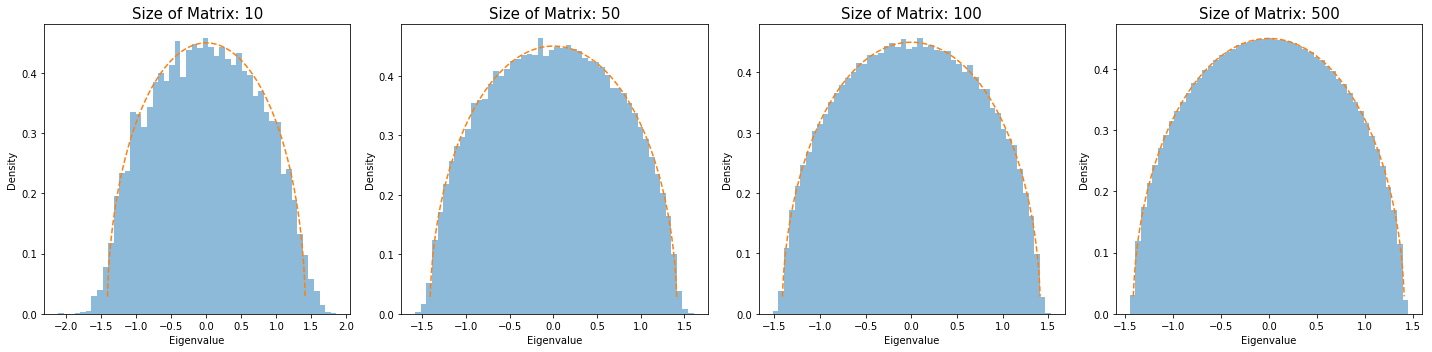

In [10]:
Size_matrix = [10, 50, 100, 500]
fig, ax = plt.subplots(1, len(Size_matrix), figsize=(20,5))
ind = 0
for i in Size_matrix:
    GOE_eig = eig_den(i, 1000, 1, rescaled = True)
    ax[ind] = plot_eig_GOE(GOE_eig, 1000, 'Size of Matrix: {}'.format(i), ax[ind])
    ind += 1
plt.tight_layout()
plt.show()

# The density of Eigenvalue spacing

In [11]:
def GOE(N):
    H1 = np.triu(np.random.normal(scale=1, size=(N,N)))
    H = H1 + H1.T
    H[range(N), range(N)] /= np.sqrt(2)
    return H

def space(H):
    N = H.shape[0]
    eigs = np.real(la.eigvalsh(H))
    eigs.sort()
    space_H = eigs[1:] - eigs[:-1]
    return space_H

def multi_space(N, sample = 1000):
    m_space = np.zeros([sample, N-1])
    for i in range(sample):
        m_space[i] = space(GOE(N))    
    return m_space

In [14]:
def plot_space_eig(X, sample, title, ax, color='Greens'):
    T = np.linspace(X.min(), X.max(), sample)
    ax.hist(X, bins=50, alpha=0.5, density=1)
    ax.plot(T, (np.pi/2)*T*np.exp((-T**2/4)*np.pi), '--', alpha=1, color='Red')
    ax.set_title(title, fontsize=15)
    ax.set_xlabel('Eigen Space', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    return ax

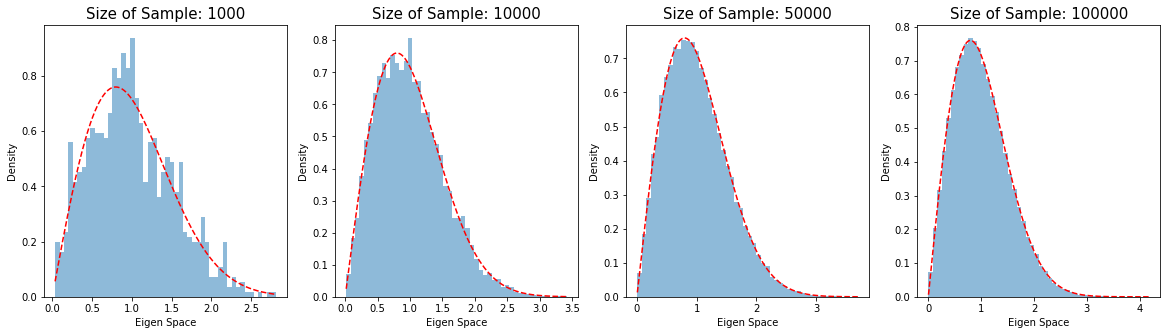

In [15]:
N = 2 
samples = [1000, 10000, 50000, 100000]
fig, ax = plt.subplots(1, len(samples), figsize=(20,5))
ind = 0
for sample in samples:
    multiR = multi_space(N, sample)
    meanR = np.sum(multiR, axis=0)/sample
    n_multiR = multiR/meanR
    ax[ind] = plot_space_eig(n_multiR, sample, "Size of Sample: {}".format(sample), ax[ind])
    ind += 1

# Marcenko-Pastus Law

In [21]:
def eig_den_GOE(N, P, Samples):
    x = []
    for sample in range(Samples):
        H = np.random.randn(N,P)
        W = np.dot(H, H.T)
        x = np.append(x, la.eigvalsh(W)/(1*N))
    return x

def plot_MPL(X, sample, xmin, xmax, title, ax, color='Greens'):
    T = np.linspace(xmin, xmax, sample)
    ax.hist(X, bins=50, alpha=0.5, density=1)
    ax.plot(T, rho(T), '--', alpha=1)
    ax.set_title(title, fontsize=15)
    ax.set_xlabel('Eigen Value', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)

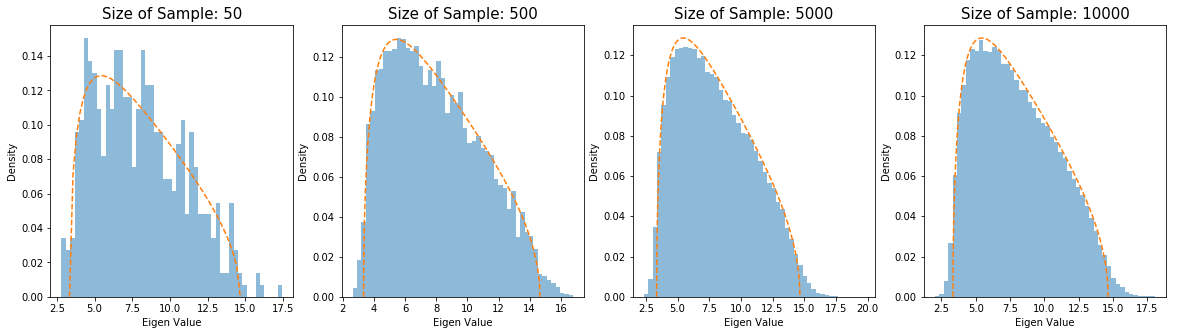

In [22]:
# Range of samples
N = 10
P = 80
Samples = [50, 500, 5000, 10000]
fig, ax = plt.subplots(1, len(Samples), figsize=(20,5))
ind = 0
for sample in Samples:
    c = N / P
    xmin = (1 - 1/np.sqrt(c))**2
    xmax = (1 + 1/np.sqrt(c))**2
    rho = lambda x: np.sqrt((x-xmin) * (xmax-x)) / (2 * np.pi * x )
    rand_mat = eig_den_GOE(N, P, sample)
    ax[ind] = plot_MPL(rand_mat, sample, xmin, xmax, "Size of Sample: {}".format(sample), ax[ind])
    ind += 1

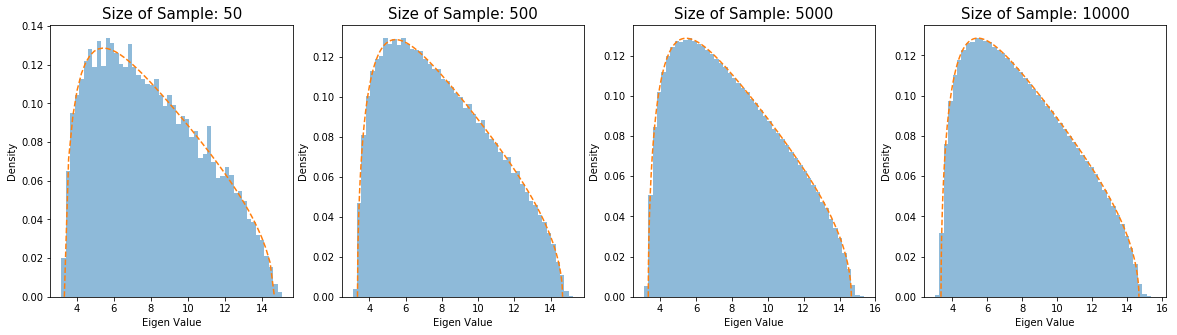

In [23]:
# Range of samples
N = 100
P = 800
Samples = [50, 500, 5000, 10000]
fig, ax = plt.subplots(1, len(Samples), figsize=(20,5))
ind = 0
for sample in Samples:
    c = N / P
    xmin = (1 - 1/np.sqrt(c))**2
    xmax = (1 + 1/np.sqrt(c))**2
    rho = lambda x: np.sqrt((x-xmin) * (xmax-x)) / (2 * np.pi * x )
    rand_mat = eig_den_GOE(N, P, sample)
    ax[ind] = plot_MPL(rand_mat, sample, xmin, xmax, "Size of Sample: {}".format(sample), ax[ind])
    ind += 1

/home/tungutokyo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


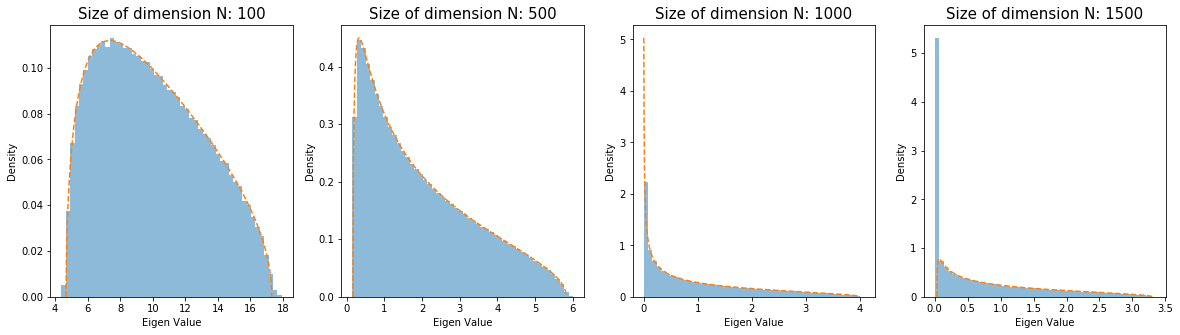

In [24]:
# Range of N 
N = [100, 500, 1000, 1500]
P = 1000
sample = 1000
fig, ax = plt.subplots(1, len(N), figsize=(20,5))
ind = 0
for n in N:
    c = n / P
    xmin = (1 - 1/np.sqrt(c))**2
    xmax = (1 + 1/np.sqrt(c))**2
    rho = lambda x: np.sqrt((x-xmin) * (xmax-x)) / (2 * np.pi * x )
    rand_mat = eig_den_GOE(n, P, sample)
    ax[ind] = plot_MPL(rand_mat, sample, xmin, xmax, "Size of dimension N: {}".format(n), ax[ind])
    ind += 1